In [ ]:
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from prettytable import PrettyTable

The note book contains the following 


     1 Business Problem

     2 Usecases

     3 Why use ML instead of Statistical analyses ?

     4 Metric

     5 Introduction to Dataset

     6 Loading Data

     7 EDA

     8 Feature Engineering

  # 1 Business Problem 
  
    1 The diabetes patient data collected from 130 hospital across US , 
    ranging from year 1999 - 2008 shows that many patients were readmitted within 30 days after conculting the doctor.

    2 These unplanned readmissions can be seen as concern for hospitals , patients and for the whole healthcare system.

    3 The aim of the case study is to takle this problem i.e. to predict these unplanned readmissions of the patients

    4 If the readmission of the patients could be predicted earlier , then steps such as 
           => changing the medication given to the patient 
           => Increasing the Stay of the patient in the hospital 

     could be taken to reduce these readmissions which benefits both the diabetes patients and the healthcare system.   

# 2 Usecases

Based on the test results , drug taken by the patient , their visits to the hospita and other factors , if it could be predicted that the patient will be readmitted then there are many usecases. They are 

            1 The doctor would know the patient will be readmitted , 
              so the doctor can change the medication as to prevent the readmission.

            2 The correct predictions , would save time and money for the patients.

            3 Many diabetes patients are aged in general , 
              So preventing their readmissions will elimiate their unncessary travel to the hospital 



# 3 Why use ML instead of statiscal Analyses ?
 
    1 Statical analyses works well for few number of attribute with small data but the problem which we are trying to solve have many attributes which should be taken into account

    2 we have A1c and max glu serum test results. More than 20 drug related attributes , patients number of visits to the hospital , their age , race etc. 
    so using Machine learning is appropriate than statiscal modelling

    3 Machine Learning algorithms have the ability to take in account and consider many attributes to give the end results.

    4 If the problem is solved using ML, it can be deployed and can be easily available to end users such as patients and doctors who can use and predict their readmissions efficiently. 

# 4 Metric

Our task is binary classification. The two classes of our task are

readmit ( class 1 ) : Diabetic Patient will be readmitted within 30 days. 

no_readmit ( class 0 ) : Diabetic Patient will not be readmitted within 30 days.



TP : predicted as readmit and real label is also readmit

FN : predicted as no_readmit but real label is also readmit

FP : predicted as readmit but real label is also no_readmit

TN : predicted as no_readmit and real label is also no_readmit

we need our models to have good sensitivity of readmit class. To achieve good sensitivity, we shoud have high True Positive and low False Negative. Achieving good sensitivity  is same as having high recall. we will select our best model using Recall.

Recall ( or Sensitivity) = ( True Positive ) / (True Positive + False Negative)

# 5 Introdcution to DATASET

 **Given** :  race , gender , age , medications the diabetes taking , A1C test results etc of diabetes patient


---



 **Task** : To predict whether the diabetes patient will be readmitted in hospital within 30 days


---

**Dataset** : https://www.kaggle.com/brandao/diabetes

---

**Dataset**  The data set has the following features :

     1 Encounter ID

     2 Patient nbr

     3 Race                          : Race of the patient

     4 Gender                        : Gender of the patient 

     5 Age                           : Age of the patient 

     6 Weight                        : Weight of the patient

     7 Admission type id             : How the patient was admitted 

     8 Discharge disposition id      : How the patient was discharged  

     9 Admission source id           : source of the admission

     10 Time in hospital             : Total time spent in hospital

     11 Payer code                   : How the payment was done

     12 Medical Speciality           : Medical speciality of the examining doctor

     13 Number of lab procedures     : Number of lab procedures undertaken

     14 Number of procedures         : Number of procedures(other than lab procedures) 

     15 number of medications        : Total number of medications 

     16 number outpatient            : Total outpatient visits

     17 number emergency             : Total Emergency visits

     18 number inpatient             : Total inpatient visits

     19 diag 1                       : Results of diag 1 

     20 diag 2                       : Results of diag 2

     13 diag 3                       : Results of diag 3

     14 numer diagnoses              : Total number of diagnoses

     15 Max glu serum                : Results of max glu serum test

     16 A1C result                   : Result of A1C test

     17 change                       : Whether the medication is changing

     18 diabetesMed                  : Whether the patient is taking any medicines or not
      
     19 readmitted 


     The following are the drugs 

      Metformin,  Repaglinide , Neteglinide , Chlorpropamide ,Glimepiride
      Acetohemaxide , Glipizide , hlorpropamide , glimepiride, 
      acetohexamide, glipizide, glyburide, tolbutamide,
      pioglitazone , rosiglitazone ,  acarbose ,  miglitol , 
      troglitazone , tolazamide, examide, citoglipton,insulin,
      glyburide-metformin, glipizide-metformin,
      glimepiride-pioglitazone , metformin-rosiglitazone,
      metformin-pioglitazone .

    The Drug attributes have the following categorical values :

      No : The drug was not prescribed to the patient
      UP : The dosage of the drug is increased
      DOWN : The dosage of the drug is decreased
      STEADY : The dosage of the drug remains same


#6 Loading DATA

In [ ]:
df = pd.read_csv('/content/diabetic_data.csv',na_values=['?'])

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#7 EDA

The features payer_code , patient_nbr, encounter_id, medical_speciality can be dropped as they are not relevant to our classification task.

In [ ]:
df = df.drop(['payer_code','encounter_id','patient_nbr','medical_specialty'],axis=1)

In [ ]:
#Remove records with discharge disposition id
df.drop(df[df['discharge_disposition_id'] ==11].index, inplace = True) # dischr disposition id  11 = expired
df.drop(df[df['discharge_disposition_id'] ==13].index, inplace = True) # dischr disposition id  13 = hospice / home
df.drop(df[df['discharge_disposition_id'] ==14].index, inplace = True) # dischr disposition id  14 = hospice / medical facility
df.drop(df[df['discharge_disposition_id'] ==19].index, inplace = True) # dischr disposition id  19 = expired at home / hospice
df.drop(df[df['discharge_disposition_id'] ==20].index, inplace = True) # dischr disposition id  20 = expired in medical facility / hospice
df.drop(df[df['discharge_disposition_id'] ==21].index, inplace = True) # dischr disposition id  21 = expired place unknown

### Missing Values

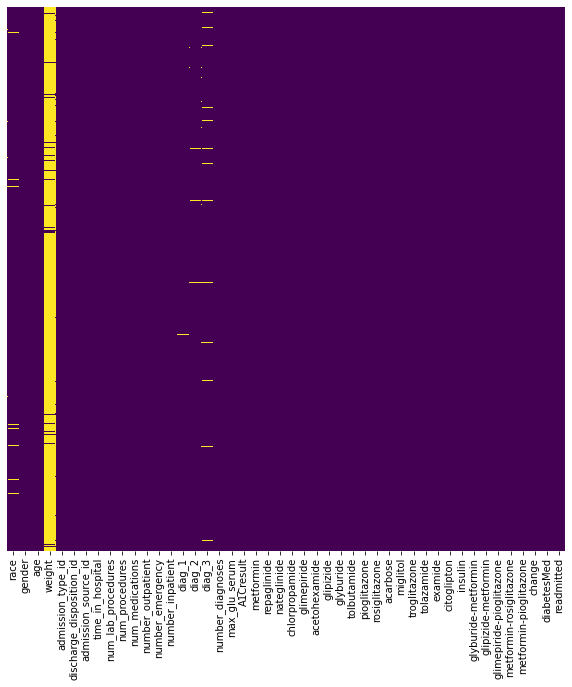

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,ax=ax,cmap='viridis')

The heat map shows that race, weight, diag_1, diag_2, diag_3 featuers have missing values

In [ ]:
columns = ['race','weight','diag_1','diag_2','diag_3']

In [ ]:
table = PrettyTable(['Column', '% of Missing values'])
for col in columns :
  temp = [val for val in list(pd.isna(df[col])) if(val==True)]
  table.add_row([col,len(temp)/len(df)*100])

In [ ]:
print(table)

+--------+----------------------+
| Column | % of Missing values  |
+--------+----------------------+
|  race  |  2.248774448124176   |
| weight |  96.85433296759712   |
| diag_1 | 0.020132269007378478 |
| diag_2 | 0.35835438833133687  |
| diag_3 |  1.4283844860735029  |
+--------+----------------------+


The rows which have race and diag_1 values missing can be removed as they are very few. 

The weight feature should be dropped because 96% of rows doesn't have weigh value.

The research paper which published the dataset states that diag_2 and diag_3 are not helpful in predicting readmission, so these two features can also be dropped.

In [ ]:
df = df.drop(['weight'],axis=1)
df = df.drop(['diag_2','diag_3'],axis=1)
df.drop(df[df['gender'] =='Unknown/Invalid'].index, inplace = True) 
df = df.dropna()

### readmitted

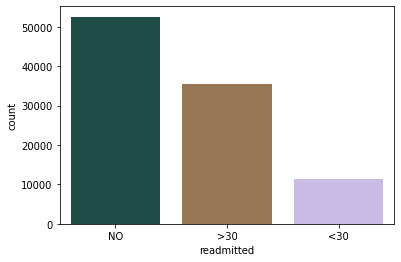

In [ ]:
sns.countplot(data = df, x = 'readmitted',palette="cubehelix")

In [ ]:
df['readmitted'] = df['readmitted'].map({'NO': 0 , '>30' : 0 , '<30' : 1}) 

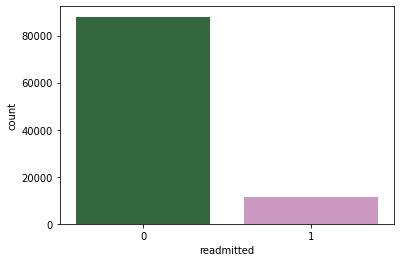

In [ ]:
sns.countplot(data = df, x = 'readmitted',palette="cubehelix")

In [ ]:
df['readmitted'].value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

### Race

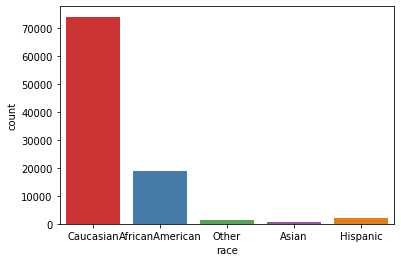

In [ ]:
sns.countplot(data = df, x = 'race',palette="Set1")

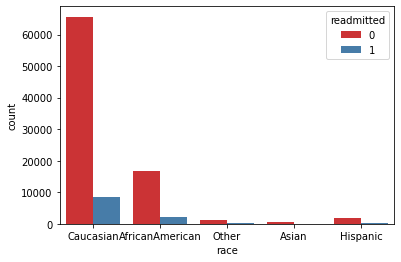

In [ ]:
sns.countplot(data = df, x = 'race',hue="readmitted",palette="Set1")

In [ ]:
df['race'].value_counts()

Caucasian          74220
AfricanAmerican    18772
Hispanic            2017
Other               1471
Asian                628
Name: race, dtype: int64

### Gender

In [ ]:
df["gender"].value_counts()

Female    53454
Male      45886
Name: gender, dtype: int64

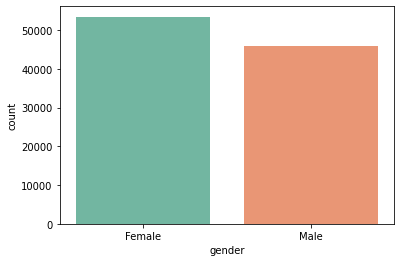

In [ ]:
sns.countplot(data = df, x = 'gender',palette="Set2")

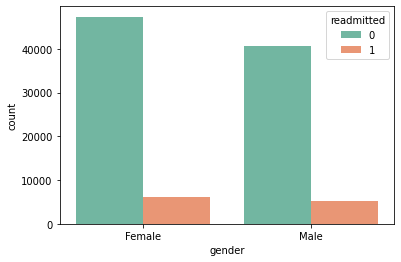

In [ ]:
sns.countplot(data = df, x = 'gender',hue="readmitted",palette="Set2")

### Age

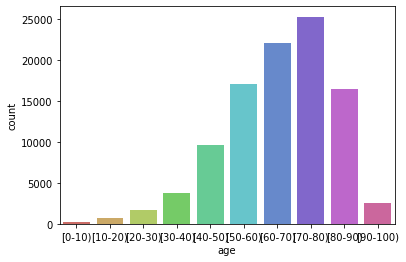

In [ ]:
sns.countplot(data = df, x = 'age',palette="hls")

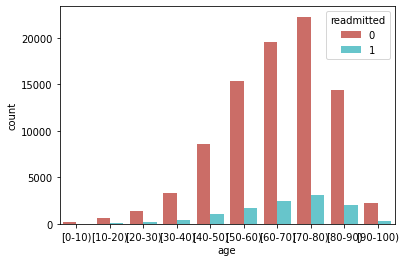

In [ ]:
sns.countplot(data = df, x = 'age',palette="hls",hue='readmitted')

In [ ]:
df['age'].value_counts()

[70-80)     25329
[60-70)     22058
[50-60)     17060
[80-90)     16434
[40-50)      9607
[30-40)      3764
[90-100)     2589
[20-30)      1649
[10-20)       690
[0-10)        160
Name: age, dtype: int64

### Admssion Type ID

Admission Type ID gives information about how the patiet was admitted 

The mapping of Admission ID are

    1 - Emergency
    2 _ Urgent
    3 - Elective
    4 - Newborn
    5 - Not available
    6 - NULL
    7 - Trauma Center
    8 - Not mapped

In [ ]:
df['admission_type_id'] = df['admission_type_id'].apply(lambda x : 5 if int(x) in [6, 8]
                                                        else int(x))

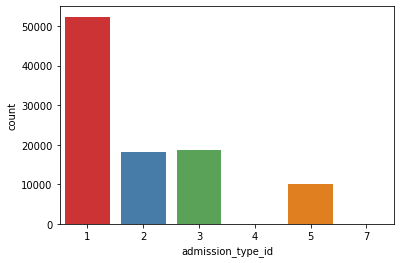

In [ ]:
sns.countplot(data = df, x='admission_type_id',palette="Set1")

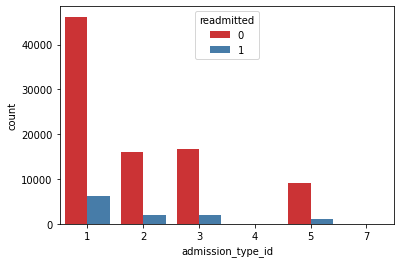

In [ ]:
sns.countplot(data = df, x='admission_type_id',hue='readmitted',palette="Set1")

In [ ]:
df["admission_type_id"].value_counts()

1    52369
3    18667
2    18132
5    10144
7       18
4       10
Name: admission_type_id, dtype: int64

### Discharge disposition ID

Discharge Disposition ID gives information about how the patient was discharged from the hospital

The mappings are 

    1 Discharged to home
    2 Discharged/transferred to another short term hospital
    3 Discharged/transferred to SNF (Skilled Nursing Facility )
    4 Discharged/transferred to ICF
    5 Discharged/transferred to another type of inpatient care institution
    6 Discharged/transferred to home with home health service
    7 Left AMA (Against Medical Advice)
    8 Discharged/transferred to home under care of Home IV provider
    9 Admitted as an inpatient to this hospital
    10 Neonate discharged to another hospital for neonatal aftercare
    11 Expired
    12 Still patient or expected to return for outpatient services
    13 Hospice / home
    14 Hospice / medical facility
    15 Discharged/transferred within this institution to Medicare approved swing bed
    16 Discharged/transferred/referred another institution for outpatient services
    17 Discharged/transferred/referred to this institution for outpatient services
    18  NULL
    19 Expired at home. Medicaid only, hospice.
    20 Expired in a medical facility. Medicaid only, hospice.
    21 Expired, place unknown. Medicaid only, hospice.
    22 Discharged/transferred to another rehab fac including rehab units of a hospital .
    23 Discharged/transferred to a long term care hospital.
    24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
    25 Not Mapped
    26 Unknown/Invalid
    27 Discharged/transferred to a federal health care facility.
    28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
    29 Discharged/transferred to a Critical Access Hospital (CAH).
    30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
 

In [ ]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x : 18 if int(x) in [25,26]
                                                        else int(x))

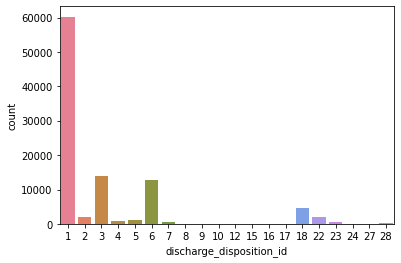

In [ ]:
sns.countplot(data = df, x='discharge_disposition_id',palette="husl")

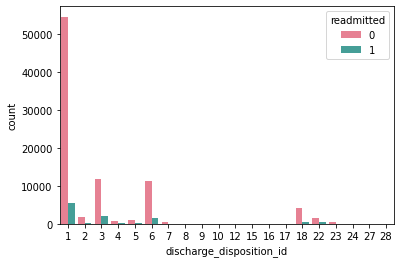

In [ ]:
sns.countplot(data = df, x='discharge_disposition_id',hue = 'readmitted',palette="husl")

In [ ]:
df["discharge_disposition_id"].value_counts()

1     60232
3     13954
6     12902
18     4680
2      2128
22     1992
5      1184
4       815
7       623
23      412
28      139
8       108
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64

### Admission Source ID

Admission source ID Mappings are

    1 - Physician Referral
    2 - Clinic Referral
    3 - HMO Referral
    4 - Transfer from a hospital
    5 -  Transfer from a Skilled Nursing Facility (SNF)
    6 -  Transfer from another health care facility
    7 -  Emergency Room
    8 -  Court/Law Enforcement
    9 -  Not Available
    10 -  Transfer from critial access hospital
    11 - Normal Delivery
    12 -  Premature Delivery
    13 -  Sick Baby
    14 -  Extramural Birth
    15 - Not Available
    17 - NULL
    18 -  Transfer From Another Home Health Agency
    19 - Readmission to Same Home Health Agency
    20 -  Not Mapped
    21 - Unknown/Invalid
    22 -  Transfer from hospital inpt/same fac reslt in a sep claim
    23 -  Born inside this hospital
    24 -  Born outside this hospital
    25 -  Transfer from Ambulatory Surgery Center
    26 - Transfer from Hospice

In [ ]:
df['admission_source_id'] = df['admission_source_id'].apply(lambda x : 9 if int(x) in [15,17, 20,21]
                                                        else int(x))

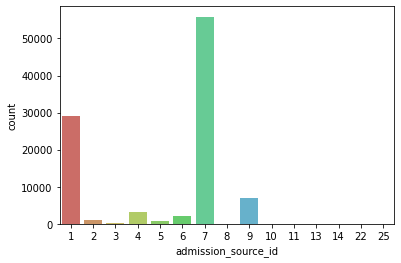

In [ ]:
sns.countplot(data = df, x='admission_source_id',palette="hls")

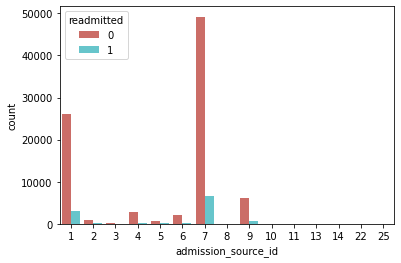

In [ ]:
sns.countplot(data = df, x='admission_source_id',hue="readmitted",palette="hls")

In [ ]:
df["admission_source_id"].value_counts()

7     55848
1     29167
9      6854
4      3118
6      2239
2      1081
5       806
3       185
8        15
22       12
10        8
25        2
14        2
11        2
13        1
Name: admission_source_id, dtype: int64

### Diag_1

1 The attributes diag_1 , diag_2 , diag_3 are the results of the first , second and third test of the diabetes patient


2 The research paper suggests that diag_2 and diag_3 are not usefule in predicting the readmission , so we can drop attributes diag_2 and diag_3

3 diag_1 attibute values are ICD9 codes (International Classification of Diseases Clinical Modification,)

4 The codes categorises diseases

            **IDC9** **CODE**                        **Group** **Name** 

            390-459 , 785                    Circulatory system  (i.e. diseases realted to circular system )
            460-519  , 786                   Respiratory system
            520-579 , 787                    Digestive 
            250.xx                           Diabetes
            800-999                          Injury 
            710-739                          Musculoskeletal
            580-629 ,788                     Genitourinary

            140–239 , 780, 781, 784, 790–799 Neoplasms
            240–279, without 250
            680–709, 782

            Any other codes.                 Other (mental disorder , nervours system etc )  

5 diag_1 values are categorical values , we can group them together using their codes


In [ ]:
def preprocess_diag(df) :

  diag_1 = []

  for index , row in df.iterrows() :

    if (str(row['diag_1']).isnumeric()) :
      val = int(row['diag_1'])

      if (val>=390 and val<=459 ) or val==785 :
        diag_1.append(1)

      elif (val>=460 and val<=519 ) or val==786 :
        diag_1.append(2)

      elif (val>=520 and val<=579 ) or val==787 :
        diag_1.append(3)


      elif (val>=800 and val<=999 ) :
       diag_1.append(5)

      elif (val>=710 and val<=739 ) :
        diag_1.append(6)

      elif (val>=580 and val<=629 ) or val==788  :
        diag_1.append(7)
   
      elif (val>=140 and val<=239 ) or (val>=790 and val<=799 ) :
        diag_1.append(8)

      elif (val>=240 and val<=279 and val!=250 ) :
        diag_1.append(8)

      elif (val>=680 and val<=709 ) :
       diag_1.append(8)

      elif (val==780 or val==781 or val==784 or val==782 ) :
       diag_1.append(8)

      else :
       diag_1.append(9)
    
    else :
      if (str(row['diag_1']).find('250.') ):
        diag_1.append(4)

      else :
        diag_1.append(9)

  df['diag_1']=diag_1

  return df

In [ ]:
df = preprocess_diag(df)

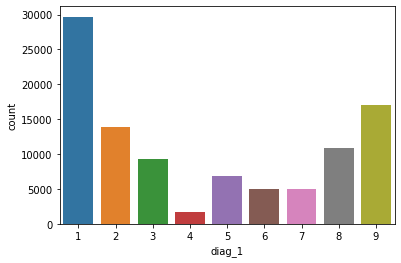

In [ ]:
sns.countplot(data = df, x='diag_1')

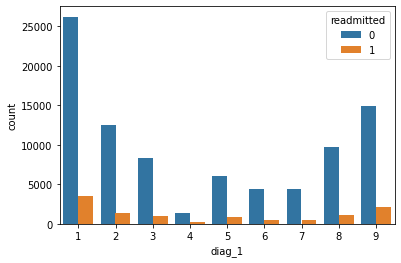

In [ ]:
sns.countplot(data = df, x='diag_1',hue = 'readmitted')

In [ ]:
df['diag_1'].value_counts()

1    29680
9    17069
2    13934
8    10883
3     9333
5     6851
7     5002
6     4935
4     1653
Name: diag_1, dtype: int64

### Max glu serum

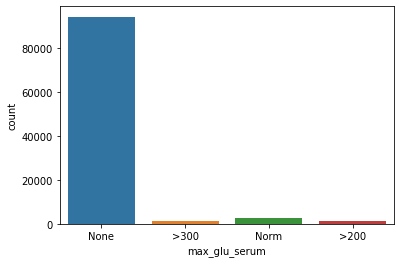

In [ ]:
sns.countplot(data = df, x='max_glu_serum')

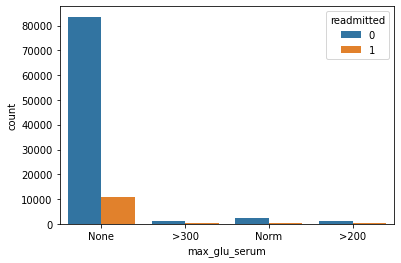

In [ ]:
sns.countplot(data = df, x='max_glu_serum',hue="readmitted")

In [ ]:
df['max_glu_serum'].value_counts()

None    94188
Norm     2545
>200     1419
>300     1188
Name: max_glu_serum, dtype: int64

### A1Cresult

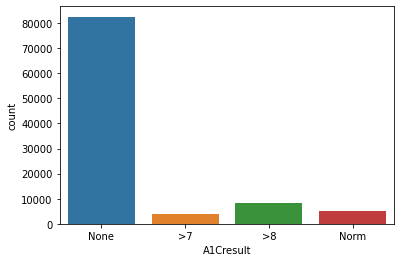

In [ ]:
sns.countplot(data = df, x='A1Cresult')

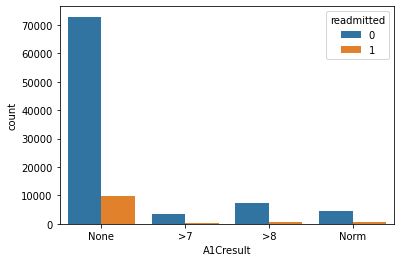

In [ ]:
sns.countplot(data = df, x='A1Cresult',hue="readmitted")

In [ ]:
df['A1Cresult'].value_counts()

None    82506
>8       8137
Norm     4922
>7       3775
Name: A1Cresult, dtype: int64

### Change

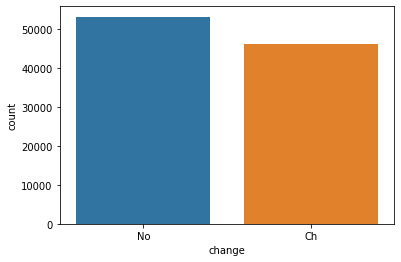

In [ ]:
sns.countplot(data = df, x='change')

### DiabetesMEd

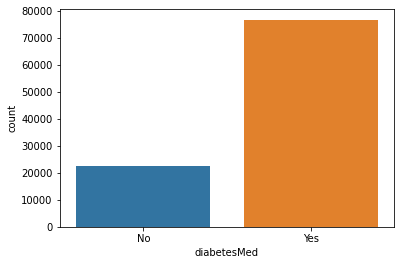

In [ ]:
sns.countplot(data = df, x='diabetesMed')

### Drug Plots

In [ ]:
def plot(categorical,x,y,size_x,size_y) :

  fig, ax = plt.subplots(x, y, figsize=(size_x, size_y))
  for variable, subplot in zip(categorical, ax.flatten()):
      sns.countplot(data = df, x = variable,hue="readmitted",ax=subplot)
      for label in subplot.get_xticklabels():
          label.set_rotation(90)

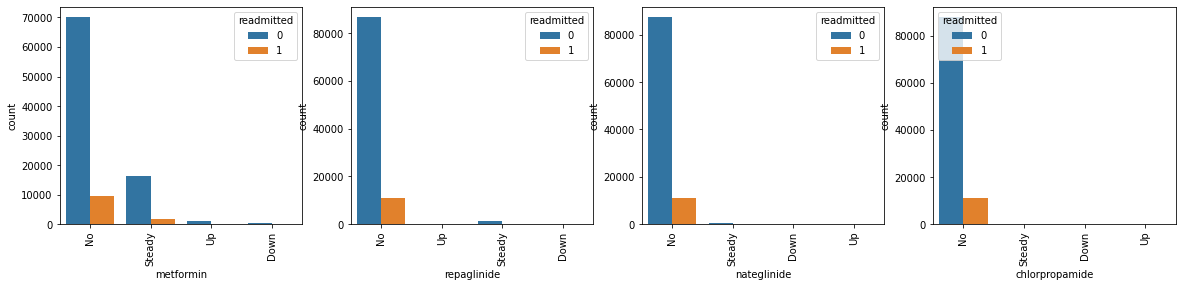

In [ ]:
categorical= ['metformin','repaglinide', 'nateglinide', 'chlorpropamide']
plot(categorical,1,4,20,4)

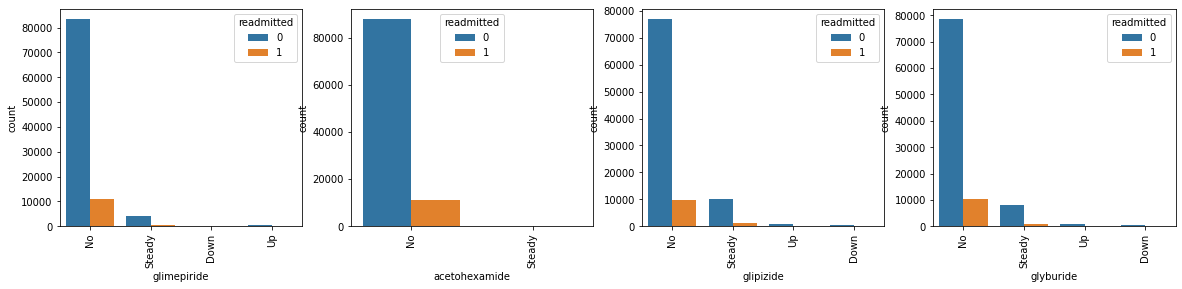

In [ ]:
categorical = ['glimepiride','acetohexamide', 'glipizide', 'glyburide']
plot(categorical,1,4,20,4)

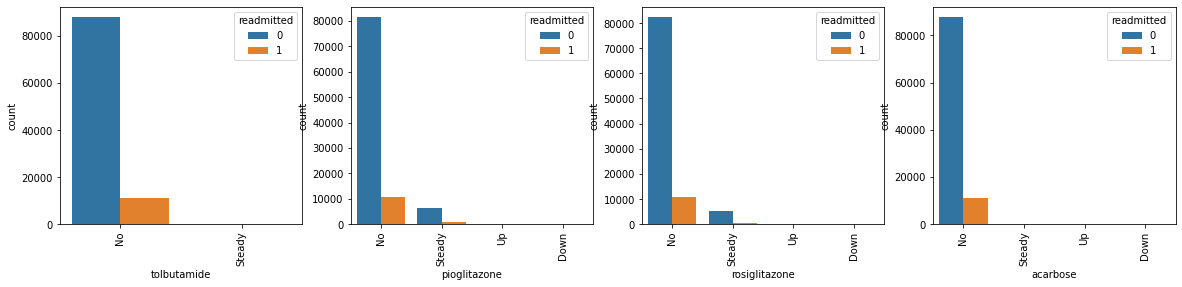

In [ ]:
categorical= [ 'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose']
plot(categorical,1,4,20,4)

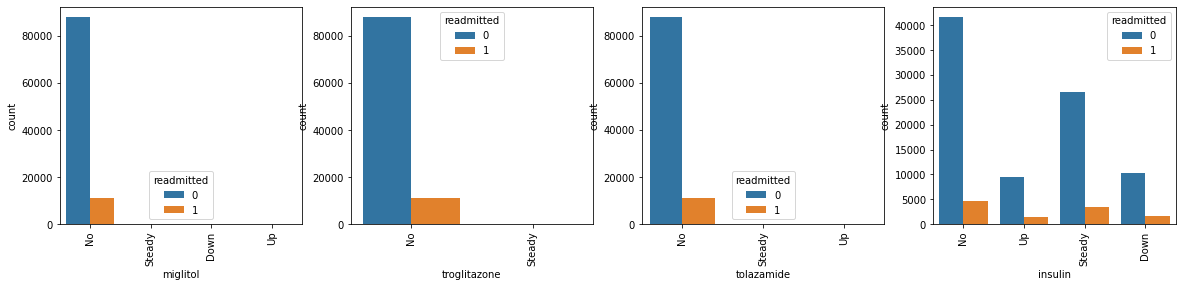

In [ ]:
categorical= [ 'miglitol', 'troglitazone','tolazamide',  'insulin']
plot(categorical,1,4,20,4)

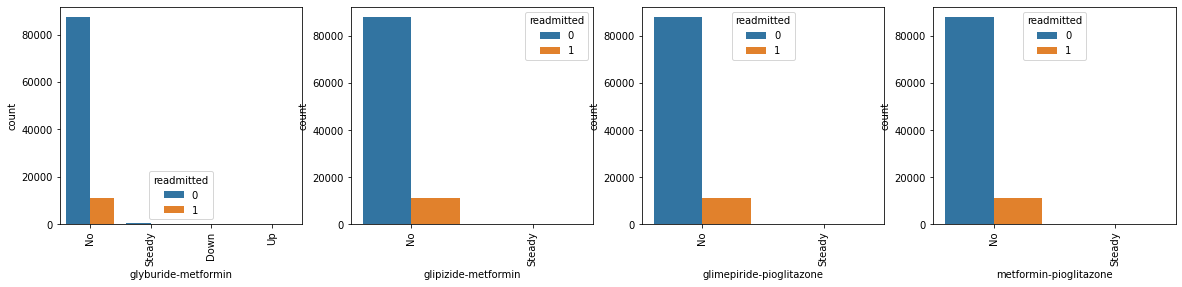

In [ ]:
categorical = ['glyburide-metformin', 'glipizide-metformin',  'glimepiride-pioglitazone', 'metformin-pioglitazone']
plot(categorical,1,4,20,4)

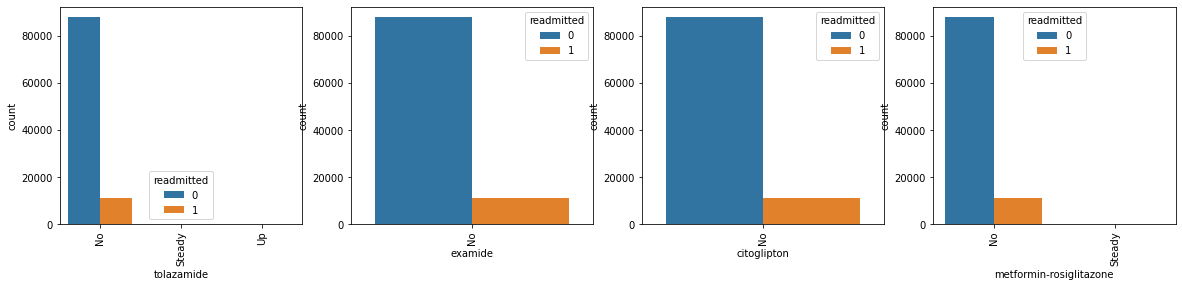

In [ ]:
categorical =[ 'tolazamide', 'examide', 'citoglipton', 'metformin-rosiglitazone']
plot(categorical,1,4,20,4)

The plots shows that all the rows of the features examide ,citoglipton, metformin-rosiglitazone have same value. So these three drug features should be dropped. The drug plots also shows that most of the drugs were not prescribed to the patients because many records fall under No Category except for the drug Insulin.

### Numerical features plots

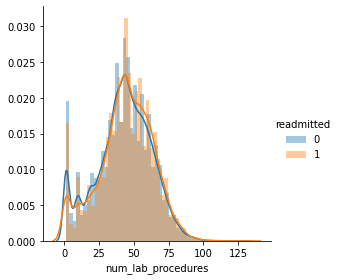

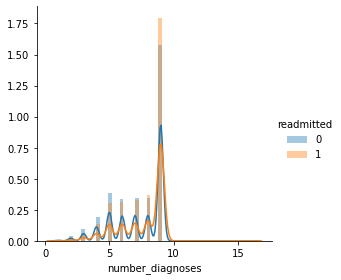

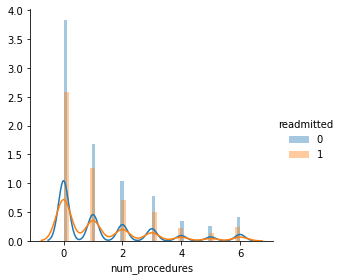

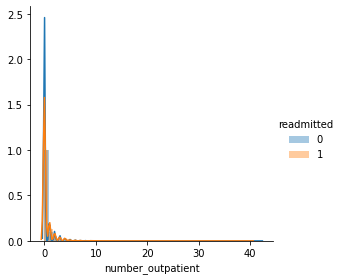

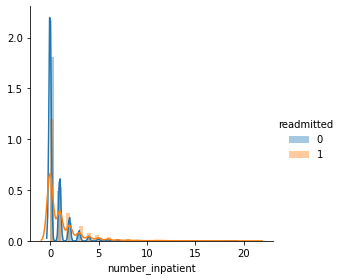

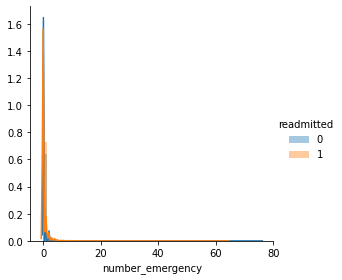

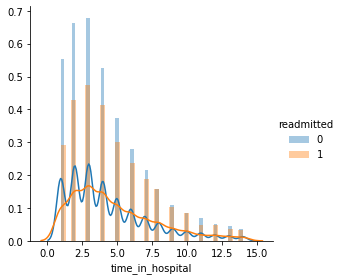

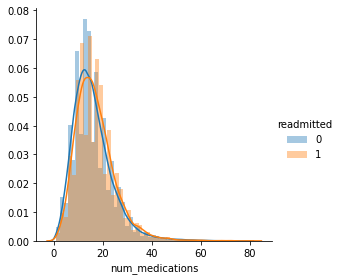

In [ ]:
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "num_lab_procedures").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "number_diagnoses").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "num_procedures").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "number_outpatient").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "number_inpatient").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "number_emergency").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "time_in_hospital").add_legend();
sns.FacetGrid(df, hue="readmitted", size=4).map(sns.distplot, "num_medications").add_legend();

The distribution plots of both classes overlaps one another for all the numerical features and doesn't provide any information which can be helpful to separate both classes.

### Pair Plots

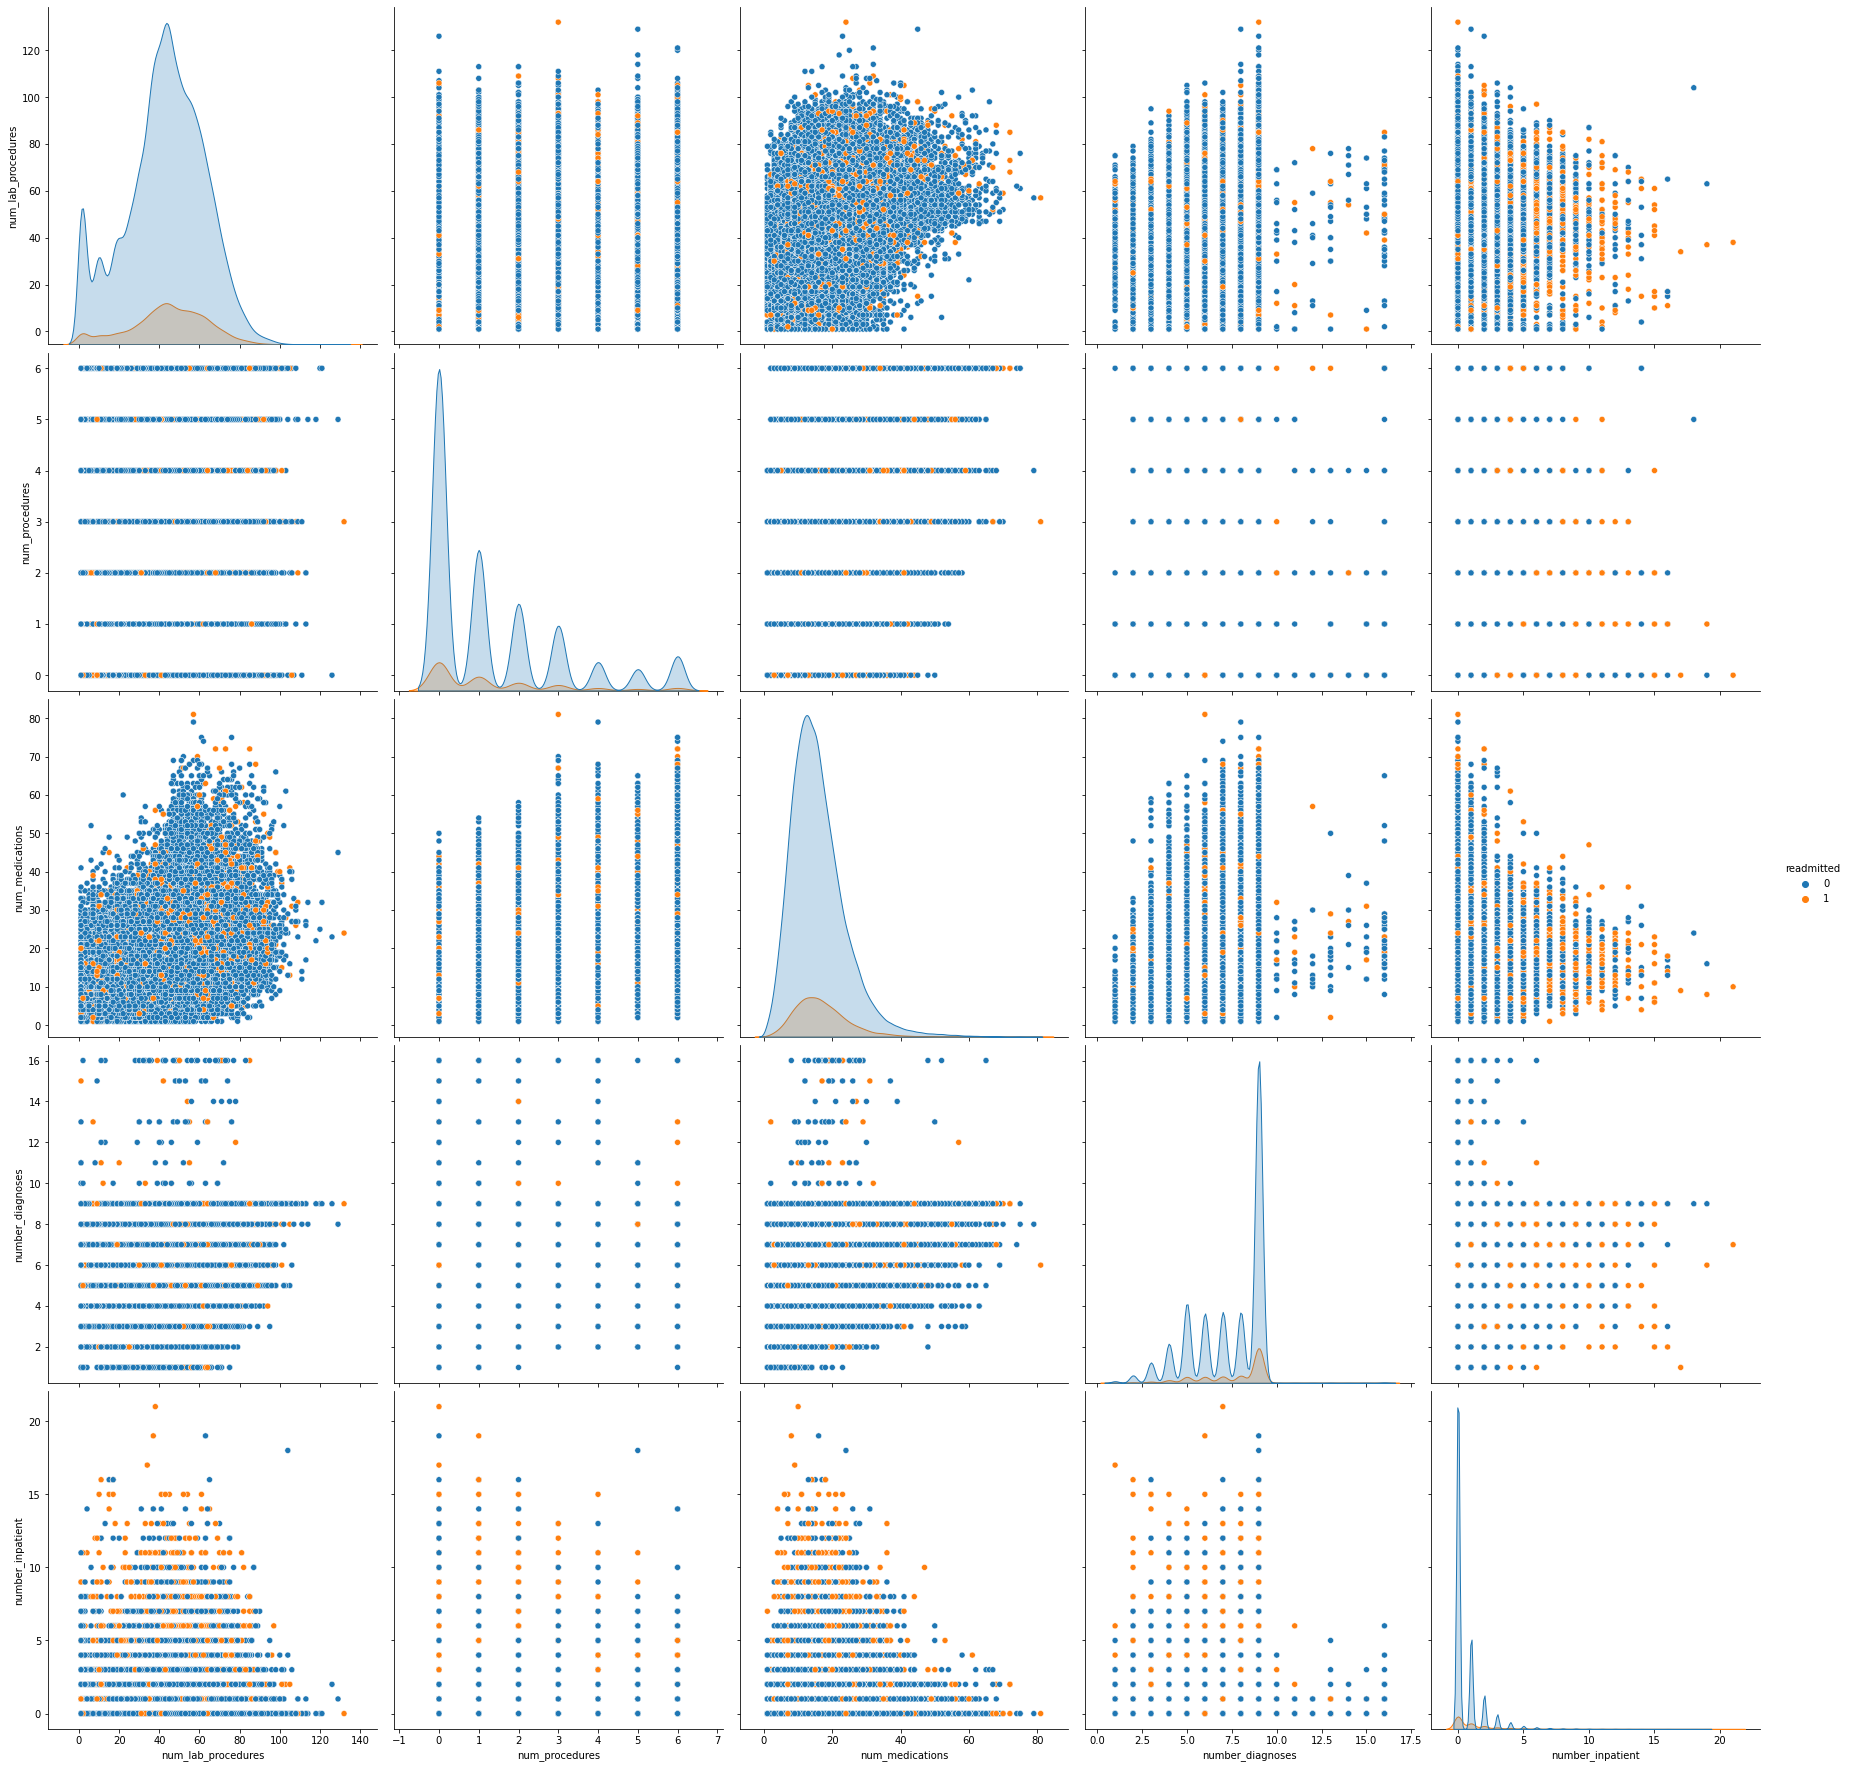

In [ ]:
new_df = pd.DataFrame()
new_df['num_lab_procedures'] = df['num_lab_procedures']
new_df['num_procedures']     = df['num_procedures']
new_df['num_medications']    = df['num_medications']
new_df['number_diagnoses']   = df['number_diagnoses']
new_df['number_inpatient']   = df['number_inpatient']
new_df['readmitted']         = df['readmitted']
sns.pairplot(new_df, hue="readmitted", size=5)

No pair plot shows any clear well defined separation between readmitted and not readmitted patients. Both classes overlaps one another.

### Bivariate Analysis

Let's try bi-variate analysis of number_inpatients with age, max_glu_serum, A1Crestults and insulin.

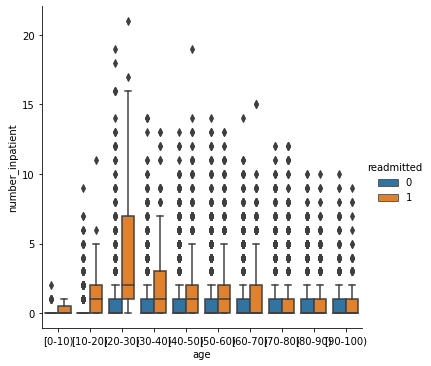

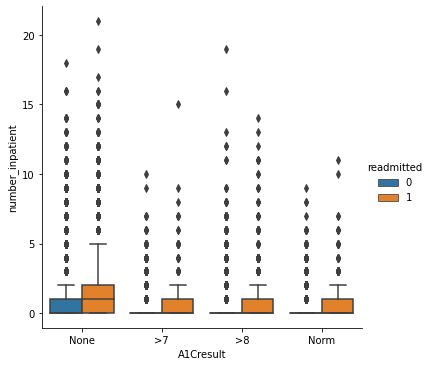

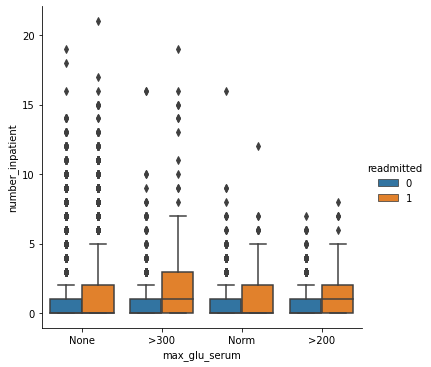

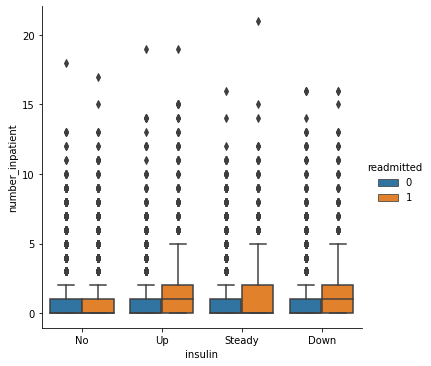

In [ ]:
sns.catplot(x="age", y="number_inpatient", hue="readmitted",kind='box',data=df)
sns.catplot(x="A1Cresult", y="number_inpatient", hue="readmitted",kind='box',data=df)
sns.catplot(x="max_glu_serum", y="number_inpatient", hue="readmitted",kind='box',data=df)
sns.catplot(x="insulin", y="number_inpatient", hue="readmitted",kind='box',data=df)

Let's try bi-variate analysis of time_in_hospital with age, max_glu_serum, A1Crestults and insulin.

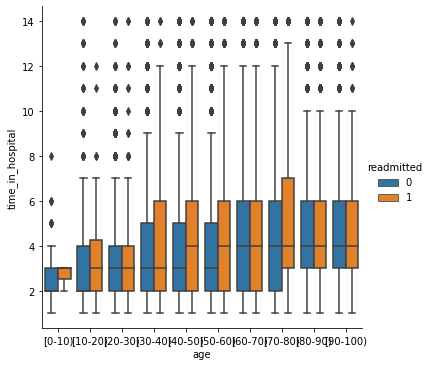

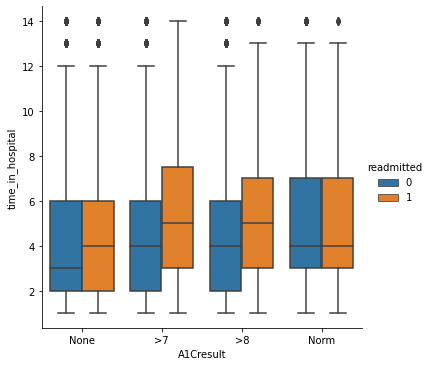

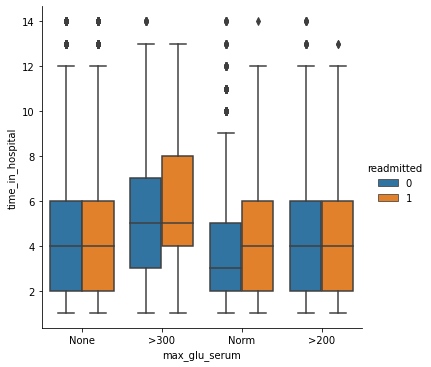

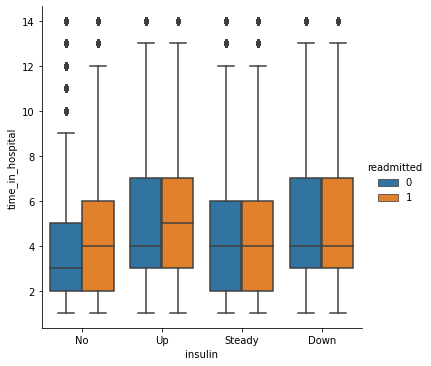

In [ ]:
sns.catplot(x="age", y="time_in_hospital", hue="readmitted",kind='box',data=df)
sns.catplot(x="A1Cresult", y="time_in_hospital", hue="readmitted",kind='box',data=df)
sns.catplot(x="max_glu_serum", y="time_in_hospital", hue="readmitted",kind='box',data=df)
sns.catplot(x="insulin", y="time_in_hospital", hue="readmitted",kind='box',data=df)

#8 Feature Engineering

### 1 Service Utilization


service utilization sums all types of visits of the patient to the hospital.

service_utilization = ( number_emergency +number_inpatient + number_outpatient )

In [ ]:
def service_utilization(df) :

  list = []

  for index , row in df.iterrows() :
    val  = row['number_emergency'] + row['number_inpatient'] + row['number_outpatient']
    list.append(val)

  return list


df['service_utilization'] = service_utilization(df)

### 2 Total Drugs PRescribed

In [ ]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone']

In [ ]:
def total_drugs_prescribed(df,drugs) :
  list = []
  for index , row in df.iterrows() :
    count = 0
    for drug in drugs :
      if row[drug]!='No' : 
        count = count +1
    list.append(count)   
  return list

drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone']
       
df['total_drugs_prescribed'] = total_drugs_prescribed(df,drugs)


### 3 Total Procedures


The feature total_procedure is the sum of num_lab_procedures and num_procedures

total_procedures = ( num_lab_procedures + num_procedures )

In [ ]:
def total_procedures(df) :
  list = []
  for index , row in df.iterrows() :
    val  = row['num_lab_procedures'] + row['num_procedures']
    list.append(val)
  return list

df['total_procedures'] = total_procedures(df)